#Part 4


Construct a CNN using Keras.models.Sequential (with the following configuration: C32, C64,
C64, F64, F10. All three convolutions layers are 3×3. Max pooling (2×2) follows each convolution layer.
Use SDG (with momentum) with a batch size of 50 and CategoricalCrossentropy as the loss.

(a) How many learnable parameters are there in this network?

(b) Report the parameters such as the learning rate and momentum.

(c) Report training and testing loss and accuracies.


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([Conv2D(32, kernel_size = 3, activation = 'relu', input_shape = (32,32,3)),
                    MaxPooling2D(pool_size=2),
                    Conv2D(64, kernel_size = 3, activation = 'relu'),
                    MaxPooling2D(pool_size=2),
                    Conv2D(64, kernel_size = 3, activation = 'relu'),
                    MaxPooling2D(pool_size=2),
                    Flatten(),
                    Dense(64, activation='relu'),
                    Dense(10, activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05,momentum=0.1),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history = model.fit(train_images, train_labels,batch_size=50, epochs=100, 
                    validation_data=(test_images, test_labels),
                    callbacks=[ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, 
                                                 verbose=1,patience=2, min_lr=0.001),
                               EarlyStopping(monitor='val_accuracy', min_delta=0.005, 
                                             patience=5, verbose=1, mode='auto',
                                             restore_best_weights=True)])

Epoch 1/100
1000/1000 [==============================] - 7s 4ms/step - loss: 2.0732 - accuracy: 0.2290 - val_loss: 1.5402 - val_accuracy: 0.4525
Epoch 2/100
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4892 - accuracy: 0.4606 - val_loss: 1.3909 - val_accuracy: 0.4875
Epoch 3/100
1000/1000 [==============================] - 4s 4ms/step - loss: 1.2944 - accuracy: 0.5409 - val_loss: 1.1995 - val_accuracy: 0.5749
Epoch 4/100
1000/1000 [==============================] - 4s 4ms/step - loss: 1.1347 - accuracy: 0.6047 - val_loss: 1.1071 - val_accuracy: 0.6131
Epoch 5/100
1000/1000 [==============================] - 4s 4ms/step - loss: 1.0442 - accuracy: 0.6337 - val_loss: 1.1496 - val_accuracy: 0.6025
Epoch 6/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.9505 - accuracy: 0.6665 - val_loss: 1.0450 - val_accuracy: 0.6338
Epoch 7/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.8908 - accuracy: 0.6866 - val_loss: 0.9707 - val_ac

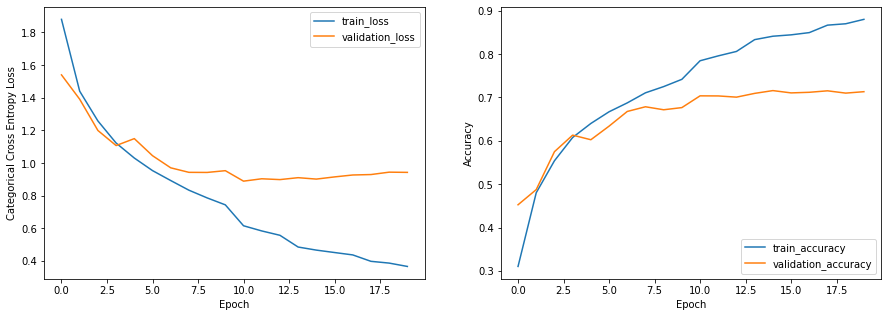

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(15,5))

axes[0].plot(history.history['loss'], label='train_loss')
axes[0].plot(history.history['val_loss'], label = 'validation_loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Categorical Cross Entropy Loss')
axes[0].legend(loc='upper right')

axes[1].plot(history.history['accuracy'], label='train_accuracy')
axes[1].plot(history.history['val_accuracy'], label = 'validation_accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend(loc='lower right');

# Additional - My Model Architecture for CIFAR10

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

my_model = Sequential([Conv2D(32, kernel_size = 3, activation = 'relu', padding='same', input_shape = (32,32,3)),
                    Conv2D(32, kernel_size = 3, activation = 'relu',padding='same'),
                    BatchNormalization(),
                    MaxPooling2D(pool_size=2),
                    Dropout(0.2),

                    Conv2D(64, kernel_size = 3, activation = 'relu', padding='same'),
                    Conv2D(64, kernel_size = 3, activation = 'relu', padding='same'),
                    BatchNormalization(),
                    MaxPooling2D(pool_size=2),
                    Dropout(0.3),

                    Conv2D(128, kernel_size = 3, activation = 'relu', padding='same'),
                    Conv2D(128, kernel_size = 3, activation = 'relu', padding='same'),
                    BatchNormalization(),
                    MaxPooling2D(pool_size=2),
                    Dropout(0.4),

                    Flatten(),
                    Dense(256, activation='relu'),
                    BatchNormalization(),
                    Dropout(0.6),
                    Dense(10, activation='softmax')])
my_model.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)       

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

my_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05,momentum=0.6),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


my_history = my_model.fit(train_images, train_labels,batch_size=50, epochs=100, 
                    validation_data=(test_images, test_labels),
                    callbacks=[ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, 
                                                 verbose=1,patience=2, min_lr=0.001),
                               EarlyStopping(monitor='val_accuracy', min_delta=0.005, 
                                             patience=10, verbose=1, mode='auto',
                                             restore_best_weights=True)])



Epoch 1/100
1000/1000 [==============================] - 9s 8ms/step - loss: 2.3544 - accuracy: 0.2524 - val_loss: 1.6292 - val_accuracy: 0.4146
Epoch 2/100
1000/1000 [==============================] - 7s 7ms/step - loss: 1.5536 - accuracy: 0.4449 - val_loss: 1.5413 - val_accuracy: 0.4443
Epoch 3/100
1000/1000 [==============================] - 7s 7ms/step - loss: 1.2812 - accuracy: 0.5405 - val_loss: 1.2235 - val_accuracy: 0.5637
Epoch 4/100
1000/1000 [==============================] - 7s 7ms/step - loss: 1.1091 - accuracy: 0.6054 - val_loss: 1.2545 - val_accuracy: 0.5561
Epoch 5/100
1000/1000 [==============================] - 7s 7ms/step - loss: 1.0045 - accuracy: 0.6455 - val_loss: 0.8682 - val_accuracy: 0.6967
Epoch 6/100
1000/1000 [==============================] - 7s 7ms/step - loss: 0.9274 - accuracy: 0.6745 - val_loss: 1.0055 - val_accuracy: 0.6433
Epoch 7/100
1000/1000 [==============================] - 7s 7ms/step - loss: 0.8681 - accuracy: 0.6943 - val_loss: 0.8296 - val_ac

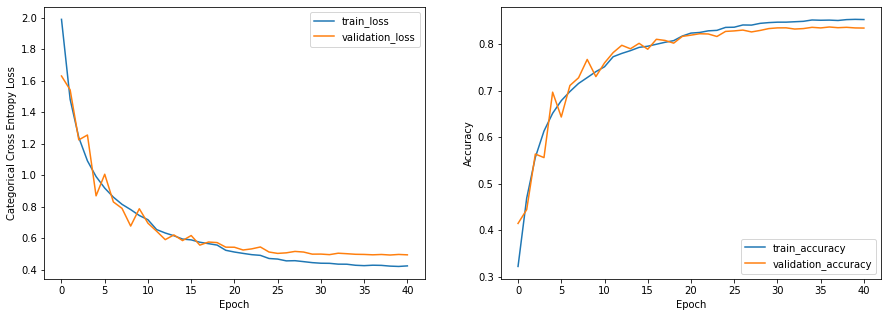

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(15,5))

axes[0].plot(my_history.history['loss'], label='train_loss')
axes[0].plot(my_history.history['val_loss'], label = 'validation_loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Categorical Cross Entropy Loss')
axes[0].legend(loc='upper right')

axes[1].plot(my_history.history['accuracy'], label='train_accuracy')
axes[1].plot(my_history.history['val_accuracy'], label = 'validation_accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend(loc='lower right');